In [1]:
# Boxplots can be used to show outliers
# you can also gauze outliers by checking if they have normal distribution and their SD is normal

In [3]:
# The median, defined as the value for which half the values are smaller and 
# the other half are bigger, is robust to such outliers

In [4]:
# Inter quartile range (Q1-Q3) is robust to outliers, much like median

In [5]:
# We can do some math to see that for normally distributed data, the IQR / 1.349 approximates 
# the standard deviation of the data had an outlier not been present.

# Tukey’s definition of an outlier
* The top whisker ends at the 75th percentile plus 1.5  ×   IQR. Similarly the bottom whisker ends at the 25th percentile minus 1.5 ×   IQR
* If we define the first and third quartiles as Q1 and Q3, respectively, then an outlier is anything outside the range:

`[Q1−1.5×(Q3−Q1),Q3+1.5×(Q3−Q1)]`

In [10]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.2.1     v purrr   0.3.3
v tibble  3.0.1     v dplyr   0.8.3
v tidyr   1.0.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [7]:
# case studies
library(dslabs)
data("reported_heights")

Warning message:
"package 'dslabs' was built under R version 3.6.3"

In [11]:
reported_heights <- reported_heights %>%
  mutate(original_heights = height, height = as.numeric(height))

Warning message:
"NAs introduced by coercion"

In [14]:
    # wrong data entries
reported_heights %>% filter(is.na(height)) %>%  head()
#filter
reported_heights <- filter(reported_heights, !is.na(height))

time_stamp,sex,height,original_heights
<chr>,<chr>,<dbl>,<chr>
2014-09-02 15:16:28,Male,NA,"5' 4"""
2014-09-02 15:16:37,Female,NA,165cm
2014-09-02 15:16:52,Male,NA,5'7
2014-09-02 15:16:56,Male,NA,>9000
2014-09-02 15:16:56,Male,NA,"5'7"""
2014-09-02 15:17:09,Female,NA,"5'3"""


In [15]:
reported_heights %>% 
  group_by(sex) %>%
  summarize(average = mean(height), sd = sd(height),
            median = median(height), MAD = mad(height))
# shows that average and sd differes in terms of median and mad, so outlier must be there

sex,average,sd,median,MAD
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Female,63.40779,27.93076,64.2,4.046164
Male,103.37705,529.86240,70.0,4.447800


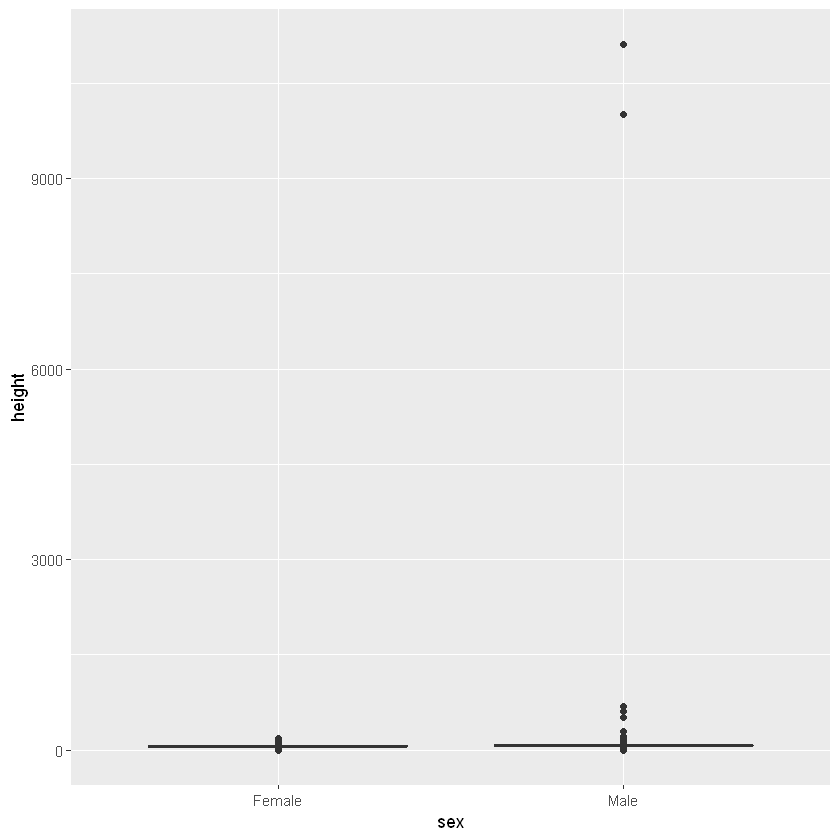

In [22]:
# lets heck that using boxplot
reported_heights %>% ggplot(aes(y = height, x = sex)) + geom_boxplot()

In [23]:
# checking extreme values
reported_heights %>% arrange(desc(height)) %>% top_n(10, height)

time_stamp,sex,height,original_heights
<chr>,<chr>,<dbl>,<chr>
2014-09-03 23:55:37,Male,11111,11111
2016-04-10 22:45:49,Male,10000,10000
2015-08-10 03:10:01,Male,684,684
2015-02-27 18:05:06,Male,612,612
2014-09-02 15:16:41,Male,511,511
2014-09-07 20:53:43,Male,300,300
2014-11-28 12:18:40,Male,214,214
2017-04-03 16:16:57,Male,210,210
2015-11-24 10:39:45,Male,192,192


In [28]:
# this is the most important things, finding out the outliers
whisker <- 3*IQR(reported_heights$height) # thats sound about right or 1.5
max_height <- quantile(reported_heights$height, .75) + whisker
min_height <- quantile(reported_heights$height, .25) - whisker
reported_heights %>% 
  filter(!between(height, min_height, max_height)) %>% 
  select(original_heights) %>%
  head(n=10) %>% pull(original_heights)

[1] "6"     "5.3"   "511"   "6"     "2"     "5.25"  "5.5"   "11111" "6"    
[10] "6.5"